### IMDb Scraper

Scrape IMDb for ratings of a series and plot it.

In [124]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [130]:
# IMDb IDs

# Game of Thrones (8 Seasons)
#imdbID = 'tt0944947'

# Breaking Bad (5 Seasons)
#imdbID = 'tt0903747'

# Rick and Morty (4 Seasons)
imdbID = 'tt2861424'

# The Simpsons (30 Seasons)
#imdbID = 'tt0096697'

# Spongebob Squarepants (11 Seasons)
#imdbID = 'tt0206512'

# The Leftovers (3 Seasons)
#imdbID = 'tt2699128'

# Chernobyl (1 Season)
#imdbID = 'tt7366338'

# Brooklyn 99 (6 Seasons)
#imdbID = 'tt2467372'

# Friends (10 Seasons)
#imdbID = 'tt0108778'

# HIMYM (9 Seasons)
#imdbID = 'tt0460649'

# TAAHM (12 Seasons)
#imdbID = 'tt0369179'

# One Piece (1 Season)
#imdbID = 'tt0388629'

# Band of Brothers (1 Season)
#imdbID = 'tt0185906'

# Avatar (3 Seasons)
#imdbID = 'tt0417299'

# Black Mirror (5 Seasons)
#imdbID = 'tt2085059'

# Westworld (2 Seasons)
#imdbID = 'tt0475784'

# House of Cards (6 Seasons)
#imdbID = 'tt1856010'

# South Park (22 Seasons)
#imdbID = 'tt0121955'

# Dark (2 Seasons)
#imdbID = 'tt5753856'

# Big Little Lies (2 Seasons)
#imdbID = 'tt3920596'

# Mr. Robot (3 Seasons)
#imdbID = 'tt4158110'

# The Handmaid's Tale (3 Seasons)
#imdbID = 'tt5834204'

# Euphoria (1 Season)
#imdbID =  'tt8772296'

In [142]:
num_seasons = 5
season = range(1,num_seasons+1)
titles = []
ratings = []
s_data = []


for s in season: 
    url = 'https://www.imdb.com/title/{}/episodes?season={}'.format(imdbID, s)
    
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text)
    
    title_list = soup.find_all('a',{'itemprop':'name'})
    rating_list = soup.find_all('span',{'class':'ipl-rating-star__rating'})
    
    for x in title_list:
        titles.append(x.text)
        s_data.append(s)

    for x in rating_list:
        #print(x.text)
        if len(x.text)==3:
            ratings.append(float(x.text))
    
print(ratings)
# Check if number of ratings and names are the same
if len(ratings)!=len(titles):
    print("Here!")
    titles = titles[:len(ratings)]
    s_data = s_data[:len(ratings)]


print(titles)

d = {'Title':titles,'Season':s_data,'Rating':ratings}
df = pd.DataFrame(d)

# If duplicates in title add season number
dup = df['Title'].duplicated(keep=False)
if not df[dup].empty:
    df['Title'].loc[dup] = df[dup].apply(lambda x: str(x.Title)+' (S'+str(x.Season)+')',axis=1)
    
df

[8.0, 8.8, 8.4, 8.7, 9.0, 9.1, 8.0, 8.8, 8.5, 9.4, 8.5, 8.9, 8.9, 8.6, 9.6, 8.3, 9.3, 8.5, 7.7, 8.6, 9.4, 9.6, 8.2, 9.3, 8.2, 8.6, 9.0, 9.8, 8.9, 8.0, 8.2, 9.1, 8.4, 8.6, 7.6, 9.0, 9.1, 8.4, 8.6, 7.6, 9.0]
Here!
['Pilot', 'Lawnmower Dog', 'Anatomy Park', 'M. Night Shaym-Aliens!', 'Meeseeks and Destroy', 'Rick Potion #9', 'Raising Gazorpazorp', 'Rixty Minutes', 'Something Ricked This Way Comes', 'Close Rick-counters of the Rick Kind', 'Ricksy Business', 'A Rickle in Time', 'Mortynight Run', 'Auto Erotic Assimilation', 'Total Rickall', 'Get Schwifty', 'The Ricks Must Be Crazy', 'Big Trouble in Little Sanchez', 'Interdimensional Cable 2: Tempting Fate', "Look Who's Purging Now", 'The Wedding Squanchers', 'The Rickshank Rickdemption', 'Rickmancing the Stone', 'Pickle Rick', 'Vindicators 3: The Return of Worldender', 'The Whirly Dirly Conspiracy', 'Rest and Ricklaxation', 'The Ricklantis Mixup', "Morty's Mind Blowers", "The ABC's of Beth", 'The Rickchurian Mortydate', 'Edge of Tomorty: Rick

,Title,Season,Rating
0,Pilot,1,8.0
1,Lawnmower Dog,1,8.8
2,Anatomy Park,1,8.4
3,M. Night Shaym-Aliens!,1,8.7
4,Meeseeks and Destroy,1,9.0
5,Rick Potion #9,1,9.1
6,Raising Gazorpazorp,1,8.0
7,Rixty Minutes,1,8.8
8,Something Ricked This Way Comes,1,8.5
9,Close Rick-counters of the Rick Kind,1,9.4


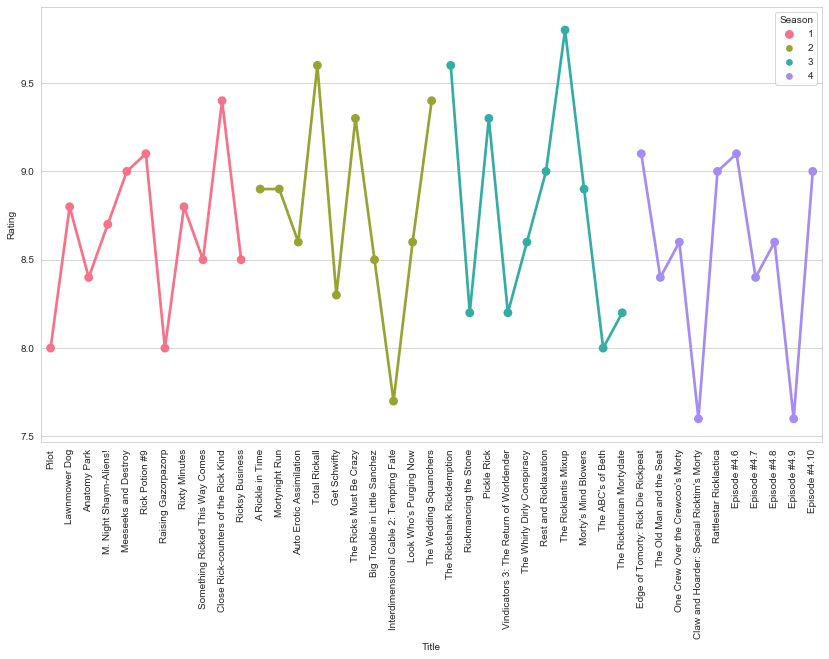

In [137]:
plt.figure(figsize=(14,8))
g = sns.pointplot(x='Title', y='Rating', 
                 hue='Season', data=df,
                 join=True,
                 legend=False,
                 palette=sns.color_palette("husl",df['Season'][df.index[-1]]))
plt.xticks(rotation=90)
plt.show()


